In [3]:
#https://stackoverflow.com/questions/42025077/how-to-apply-calculations-to-elements-of-a-multidimensional-matrix-in-tensorflow
#https://learningtensorflow.com/lesson4/    
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os


Tensor("Placeholder:0", shape=(?, ?, ?), dtype=float32)
tulipan2.jpg


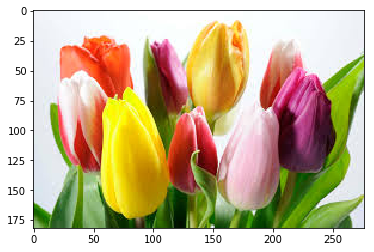

Tensor("Placeholder_1:0", shape=(?, ?, ?), dtype=float32)
tulipan1.jpg


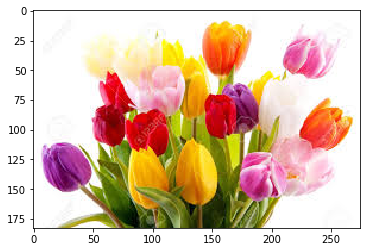

Tensor("Placeholder_2:0", shape=(?, ?, ?), dtype=float32)
tulipan5.jpg


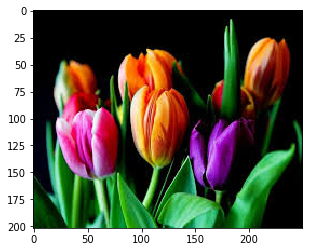

Tensor("Placeholder_3:0", shape=(?, ?, ?), dtype=float32)
tulipan4.jpg


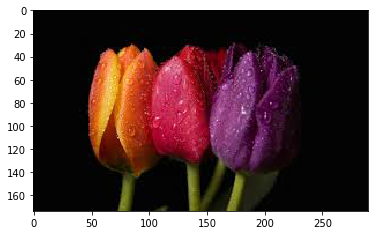

Tensor("Placeholder_4:0", shape=(?, ?, ?), dtype=float32)
tulipan3.jpg


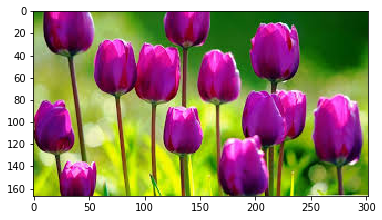

In [4]:
# First, load the image again
#dir_path = os.path.dirname(os.path.realpath('__file__'))
#filename = "/notebooks/Imagenes/800.png"
#print(filename)
#raw_image_data = mpimg.imread(filename, "")

di = '/notebooks/Imagenes/flores'
dir_path = os.listdir(di)

for i in dir_path:
   
    raw_image_data = mpimg.imread(di+'/'+i,"")
    image = tf.placeholder ("float",[None,None,None])
    r = tf.slice(image,[0,0,0],[-1,-1,1])
    g = tf.slice(image,[0,0,1],[-1,-1,1])
    b = tf.slice(image,[0,0,2],[-1,-1,1])
    print (image)
    
    #r = tf.scalar_mul(0.2126,r)
    #g = tf.scalar_mul(0.7152,g)
    #b = tf.scalar_mul(0.0722,b)
    grey = tf.add(r,tf.add(g,b))
    
    #concat(valores,eje,name='concat{})
    #out = tf.concat(2, [r,g,b])
    #out = tf.concat(2, [grey,grey, grey])
    out = tf.concat([r,g,b], 2 )
    out = tf.cast(out, tf.uint8)
    
    print(i)
    
    with tf.Session() as session:
        result = session.run(out, feed_dict={image: raw_image_data})
        plt.imshow(result,cmap=plt.get_cmap('seismic'))
        
        plt.show()
        
   

In [5]:

image2 = tf.placeholder("uint8", [None, None, 4])
# tf.slice(image2, [inicio, inicio, inicio], [filas, -1, -1])
slice = tf.slice(image2, [0, 0, 0], [-1, -1, -1])

with tf.Session() as session:
    result = session.run(slice, feed_dict={image2: raw_image_data})
    print(result.shape)

plt.imshow(result)
plt.show()

ValueError: Cannot feed value of shape (167, 302, 3) for Tensor u'Placeholder_5:0', which has shape '(?, ?, 4)'